In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
####------Open In cvs and create a dataframe-----####
df = pd.read_csv("Escooter.csv")
df.head()

,TripID,StartDate,StartTime,EndDate,EndTime,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum
0,0000045c-2677-3a7d-4b73-cad99a57,6/26/2019,19:30,6/26/2019,19:30,3,0.000,38.253,-85.756,38.253,-85.755,4,19
1,0000487b-92e6-50d6-7569-42ed3818,9/22/2019,14:30,9/22/2019,14:30,5,0.000,38.203,-85.752,38.204,-85.751,1,14
2,00006088-2579-e0d0-6a30-a15bb878,8/21/2019,17:30,8/21/2019,17:30,6,0.330,38.259,-85.733,38.265,-85.739,4,17
3,00008c1a-899b-8596-970f-9f6bf495,7/3/2019,11:00,7/3/2019,11:15,6,0.640,38.217,-85.757,38.221,-85.763,4,11
4,00009301-3225-2aea-a84a-165a480a,11/22/2019,10:45,11/22/2019,11:00,7,0.599,38.215,-85.759,38.222,-85.764,6,10


In [32]:
#Convert the StartDate and Endate to pandas date format
df['StartDate'] =pd.to_datetime(df.StartDate,format='%Y%m%d')
df['EndDate'] =pd.to_datetime(df.EndDate, format='%Y%m%d')
df.StartTime= df.StartTime + ':00'
df.EndTime= df.EndTime + ':00'
#df['StartTime'] = pd.to_timedelta(df.StartTime)
#df['EndTime'] = pd.to_timedelta(df.EndTime)

# This now sorts in date order
df = df.sort_values(by='StartDate') 
df.reset_index(inplace=True, drop=True)


In [33]:
#create a function for choosing date.
def date_splitter(dataframe,start_date,end_date):
    start_date = '2018-08-09'
    end_date = '2018-12-30'
    name = (df['StartDate'] >= start_date) & (df['StartDate'] <= end_date)
    return name

#Give the start date and end date 
start_date = '2018-08-09'
end_date ='2018-12-09'

#call the date function to split
mask = date_splitter(df,start_date,end_date)        


In [34]:
#Create new dataframe with the choosen dates from original dataframe
df_one = df.loc[mask]
#df_one.iloc[-1]
unique = df_one['StartDate'].unique()
print(len(unique))

143


[Text(0, 0, '2018-08-09T00:00:00.000000000'), Text(1, 0, '2018-08-10T00:00:00.000000000'), Text(2, 0, '2018-08-11T00:00:00.000000000'), Text(3, 0, '2018-08-12T00:00:00.000000000'), Text(4, 0, '2018-08-13T00:00:00.000000000'), Text(5, 0, '2018-08-14T00:00:00.000000000'), Text(6, 0, '2018-08-15T00:00:00.000000000'), Text(7, 0, '2018-08-16T00:00:00.000000000'), Text(8, 0, '2018-08-17T00:00:00.000000000'), Text(9, 0, '2018-08-18T00:00:00.000000000'), Text(10, 0, '2018-08-19T00:00:00.000000000'), Text(11, 0, '2018-08-20T00:00:00.000000000'), Text(12, 0, '2018-08-21T00:00:00.000000000'), Text(13, 0, '2018-08-22T00:00:00.000000000'), Text(14, 0, '2018-08-23T00:00:00.000000000'), Text(15, 0, '2018-08-24T00:00:00.000000000'), Text(16, 0, '2018-08-25T00:00:00.000000000'), Text(17, 0, '2018-08-26T00:00:00.000000000'), Text(18, 0, '2018-08-27T00:00:00.000000000'), Text(19, 0, '2018-08-28T00:00:00.000000000'), Text(20, 0, '2018-08-29T00:00:00.000000000'), Text(21, 0, '2018-08-30T00:00:00.000000000'

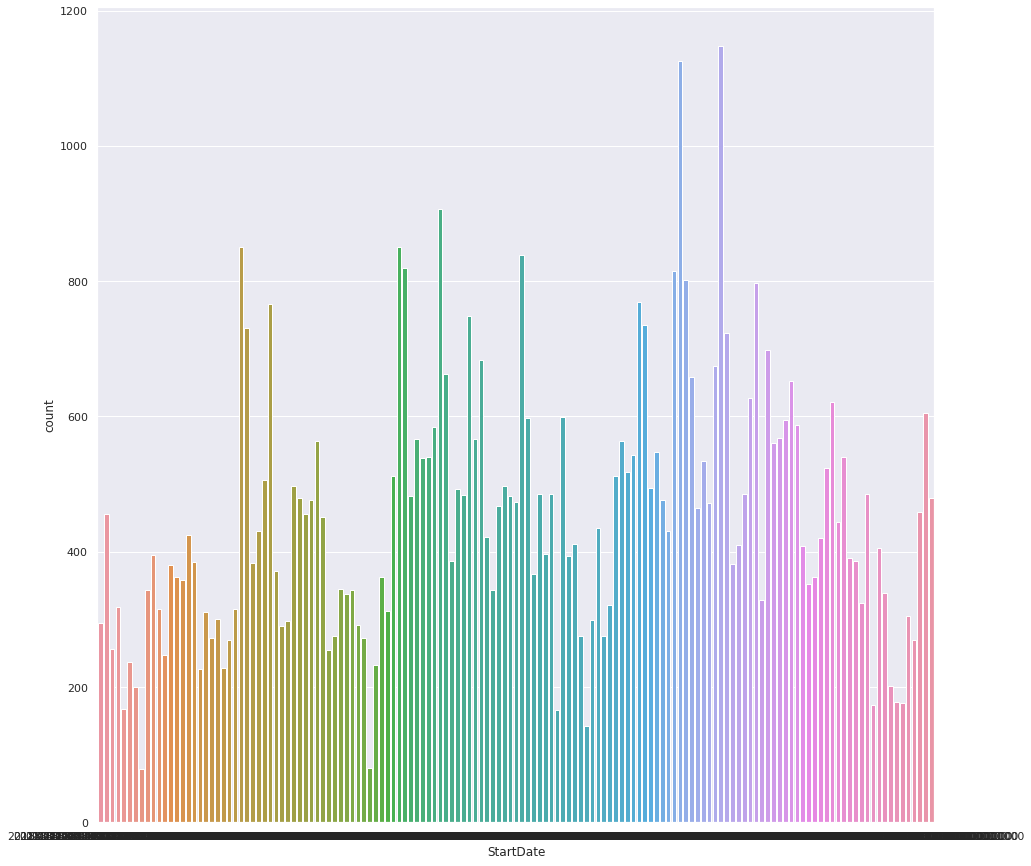

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')

plt.figure(figsize=(15,15))
ax = sns.countplot(x='StartDate',data=df_one)
loc, labels = plt.xticks()
dates = [df.StartDate.strptime(d,'%Y-%m-%d').date() for d in dates]
ax.set_xticklabels(labels, rotation=90)

plt.show()

In [31]:
freq = df_one['StartDate']
type(freq)
f = pd.DataFrame(freq)
f.sort_values(by='StartDate')


,StartDate
0,2018-08-09
200,2018-08-09
199,2018-08-09
198,2018-08-09
197,2018-08-09
...,...
65027,2018-12-30
65026,2018-12-30
65025,2018-12-30
65113,2018-12-30
